In [1]:
import os
import pandas as pd

In [16]:
print(os.getcwd())
df = pd.read_csv("winequality-red.csv", sep=";")
df.head

/Users/Samuele 1/Documents/GitHub/AAAMLP/cross_val


<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

### We control the various quality levels of the red wine

In [17]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

### Let's change these values in something more interpretable

In [18]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}
df.loc[:,"quality"] = df.quality.map(quality_mapping)
df["quality"].unique()

array([2, 3, 4, 1, 5, 0])

### Dataset has 1599 rows
Let's divide a train set and test set and use a decision tree classifier

In [19]:
# Sample takes a random sample from the dataframe, frac gives the fraction of the sample. Easy way to shuffle a dataframe
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

## Decision tree model

Train accuracy increases, but not test accuracy. We have overfitted!


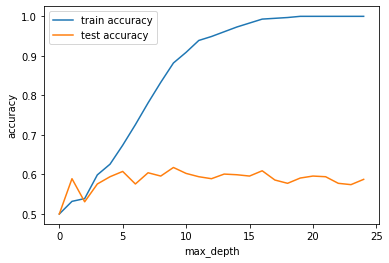

In [33]:
from sklearn import tree
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

depths = np.arange(0, 25)

train_acc = [0.5]
test_acc = [0.5]

for depth in depths[1:]:

    # Decision tree
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # Columns used aka features
    cols = ['fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol']

    # Training the model
    clf.fit(df_train[cols], df_train.quality)

    train_predictions = clf.predict(df_train[cols])

    test_prediction = clf.predict(df_test[cols])

    train_accuracy = metrics.accuracy_score(
        df_train.quality,
        train_predictions
        )

    test_accuracy = metrics.accuracy_score(
        df_test.quality,
        test_prediction
    )

    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)


plt.plot(depths, train_acc)
plt.plot(depths, test_acc)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'test accuracy'])
print('Train accuracy increases, but not test accuracy. We have overfitted!')